In [1]:
import pandas as pd
import sys
import os
from transformers import pipeline
from pandas.errors import EmptyDataError
import datetime as datetime
import json
import torch
import tensorflow
import statsmodels.formula.api as smf

os.chdir('/Users/joannakuc/Git/webscraping_meditation')
print(os.getcwd())  # prints the current working directory

In [2]:
# First load all of the merged trip reports
df = pd.read_csv('processed/bartmnli_final.csv')
df.head()

# Drop rows with NaN values in the 'bartmnli_happy' column
print(df.shape)

(7683, 11)


In [3]:
# Create a list of meditation related terms
meditation_dict = ['meditation', 'meditate', 'meditated']

In [4]:
# Write a function that will count how many times a term appears in a text
def count_terms(text, terms):
    count = 0
    # Check if string
    if isinstance(text, str):
        text = text.lower()
        for term in terms:
            count += text.lower().count(term)
    return count

# Apply the function to the text column
df['MeditationCount'] = df['Report'].apply(lambda x: count_terms(x, meditation_dict))

In [5]:
df

,Title,Category,Report,Source,UniqueID,bartmnli_happy,bartmnli_calm,bartmnli_gloomy,bartmnli_angry,bartmnli_inferred_valence,bartmnli_inferred_arousal,MeditationCount
0,Spacey.,Microdosing,I've always been fairly sensitive to drugs of ...,shroomery,1-Wild-brash-tense-keen-soft-plate,0.533623,0.205692,0.159543,0.101142,0.478629,0.269529,0
1,Frozen Bridgesii,Microdosing,"I have frozen some cuttings, and having had go...",shroomery,1-Nine-obese-elfin-tidy-ugly-home,0.865566,0.082510,0.025943,0.025980,0.896153,0.783093,0
2,Golden Teacher Not Potent,Microdosing,I just harvested Golden Teache - about a pound...,shroomery,1-Lowly-tangy-proud-godly-tough-level,0.205946,0.342545,0.320734,0.130775,0.096984,-0.326558,0
3,MD Journal,Microdosing,"Micro-dosing JournalTuesday, May 2, 2017: firs...",shroomery,1-Wrong-proud-vague-royal-great-skin,0.293767,0.353191,0.217403,0.135639,0.293916,-0.141188,17
4,Amanita muscaria alaska,Microdosing,"Okay, I wanted to give my firsthand experience...",shroomery,1-Mere-drunk-lowly-nine-half-great,0.369472,0.597715,0.024566,0.008247,0.934374,-0.244563,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7678,acid tripping at a mile high,Other Substances,Yesterday I took a great leap in my mind: I to...,shroomery,1-Tame-fuzzy-last-hot-flat-wheel,0.295255,0.418045,0.165321,0.121378,0.426601,-0.166733,0
7679,Just Weed,Other Substances,I dont know if you can consider this a trip be...,shroomery,1-Cheap-mushy-roomy-empty-cheap-visit,0.147570,0.135277,0.596893,0.120259,-0.434305,-0.464341,0
7680,Yowza!,Other Substances,Lets get started!I finally managed to get my m...,shroomery,1-Elite-cute-kind-fuzzy-nosy-date,0.348761,0.303263,0.238150,0.109826,0.304048,-0.082826,0
7681,Acid trip on Longs Peak,Other Substances,LSA trip on longs peak took a good amount of L...,shroomery,1-Odd-keen-new-meek-green-crew,0.725440,0.150889,0.061685,0.061986,0.752659,0.574852,0


In [17]:
# Print range of vals in MeditationCount
print(df['MeditationCount'].min())
print(df['MeditationCount'].max())
# Print number of reports with >0 meditation terms
print(len(df[df['MeditationCount'] > 0]))


0
23
294


In [18]:
# Print the value of column Report for rows where MeditationCount > 0
for i in range(0, len(df)):
    if df['MeditationCount'][i] > 0:
        print()
        print(df['MeditationCount'][i])
        print(df['Report'][i])
        print('')

<Axes: >

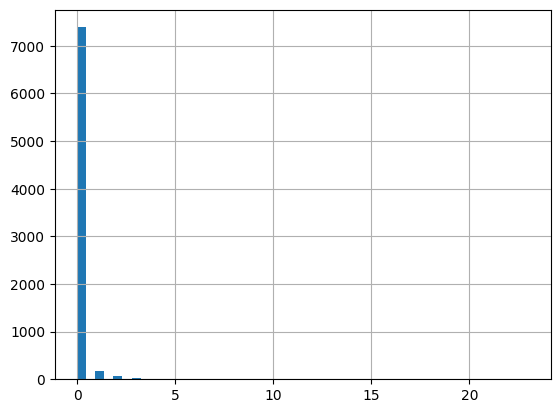

In [6]:
# Print histogram of MeditationCount 
df['MeditationCount'].hist(bins=50)

In [7]:
# Create a column with 0 if no meditation terms, 1 if there are
df['MeditationBinary'] = df['MeditationCount'].apply(lambda x: 1 if x > 0 else 0)

In [9]:
model = smf.ols(f"bartmnli_inferred_arousal ~ MeditationBinary", df)
result = model.fit()
print(result.summary())

                                OLS Regression Results                               
Dep. Variable:     bartmnli_inferred_arousal   R-squared:                       0.005
Model:                                   OLS   Adj. R-squared:                  0.005
Method:                        Least Squares   F-statistic:                     40.27
Date:                       Tue, 16 Apr 2024   Prob (F-statistic):           2.34e-10
Time:                               08:27:56   Log-Likelihood:                -2781.1
No. Observations:                       7683   AIC:                             5566.
Df Residuals:                           7681   BIC:                             5580.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

<Axes: xlabel='MeditationBinary', ylabel='bartmnli_inferred_arousal'>

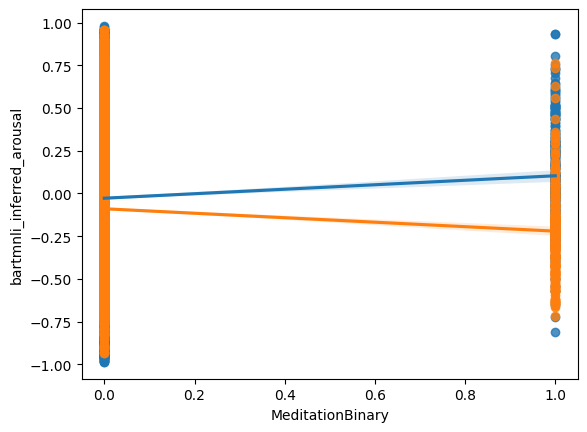

In [31]:
# Regplot 
import seaborn as sns
sns.regplot(x='MeditationBinary', y='bartmnli_inferred_valence', data=df)
sns.regplot(x='MeditationBinary', y='bartmnli_inferred_arousal', data=df)

In [13]:
# Print mean score for valence for reports with meditation terms
print(df[df['MeditationBinary'] == 1]['bartmnli_inferred_valence'].mean())
print(df[df['MeditationBinary'] == 0]['bartmnli_inferred_valence'].mean())

# Print mean score for valence for reports with meditation terms
print(df[df['MeditationBinary'] == 1]['bartmnli_inferred_arousal'].mean())
print(df[df['MeditationBinary'] == 0]['bartmnli_inferred_arousal'].mean())

0.103610805492392
-0.02780900329022078
-0.22074555597730539
-0.08958480014882443


In [15]:
import statsmodels.api as sm

# Assuming 'meditation_count' is the count of meditation-related terms in each report
X = df[['MeditationBinary']]  # Predictor
X = sm.add_constant(X)  # Adds a constant term to the predictor

# Valence model
y_valence = df['bartmnli_inferred_valence']
model_valence = sm.OLS(y_valence, X)
results_valence = model_valence.fit()
print(results_valence.summary())

# Arousal model
y_arousal = df['bartmnli_inferred_arousal']
model_arousal = sm.OLS(y_arousal, X)
results_arousal = model_arousal.fit()
print(results_arousal.summary())

                                OLS Regression Results                               
Dep. Variable:     bartmnli_inferred_valence   R-squared:                       0.004
Model:                                   OLS   Adj. R-squared:                  0.004
Method:                        Least Squares   F-statistic:                     28.98
Date:                       Tue, 16 Apr 2024   Prob (F-statistic):           7.53e-08
Time:                               08:34:13   Log-Likelihood:                -4059.8
No. Observations:                       7683   AIC:                             8124.
Df Residuals:                           7681   BIC:                             8138.
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [26]:
valence_threshold = 0
arousal_threshold = 0

# Define 'anxious' based on thresholds
df['anxious'] = ((df['bartmnli_inferred_valence'] < valence_threshold) & (df['bartmnli_inferred_arousal'] > arousal_threshold)).astype(int)

# Logistic regression
X_log = df[['MeditationBinary']]  # Predictor
X_log = sm.add_constant(X_log)  # Adds a constant term to the predictor
y_log = df['anxious']

logit_model = sm.Logit(y_log, X_log)
logit_results = logit_model.fit()
print(logit_results.summary())


Optimization terminated successfully.
         Current function value: 0.345564
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                anxious   No. Observations:                 7683
Model:                          Logit   Df Residuals:                     7681
Method:                           MLE   Df Model:                            1
Date:                Tue, 16 Apr 2024   Pseudo R-squ.:                0.004986
Time:                        08:37:18   Log-Likelihood:                -2655.0
converged:                       True   LL-Null:                       -2668.3
Covariance Type:            nonrobust   LLR p-value:                 2.491e-07
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.0550      0.037    -56.043      0.000      -2.127      -1.983
MeditationB

In [27]:
import numpy as np

# Calculate the odds ratio for MeditationBinary
odds_ratio = np.exp(-1.4003)
print("Odds ratio for MeditationBinary:", odds_ratio)


Odds ratio for MeditationBinary: 0.24652299594817775
